<a href="https://colab.research.google.com/github/marty916/AI-Training-Colab-Notebooks/blob/main/Fundamentals%20of%20Data%20Science/FODS_Session7_Key_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Key Algorithms in Data Science

## Setup Environment

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Linear Regression Example
**Description:** Linear Regression is used to predict a continuous value. For example, predicting house prices based on the number of rooms.

**Dataset:** Boston Housing Dataset

[test_train_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# Load the Boston Housing dataset from Kaggle link
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)

# Selecting the 'RM' feature and the target variable
X = boston[['rm']]  # 'rm' feature represents the average number of rooms per dwelling
Y = boston['medv']  # 'medv' is the median value of owner-occupied homes in $1000s

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Making predictions
predictions = model.predict(X_test)

# Showing some predictions and actual values
print("Predictions:", predictions[:5])
print("Actual values:", Y_test[:5].tolist())


Predictions: [23.73238293 26.92950201 19.68456842 20.45112913 22.61993506]
Actual values: [23.6, 32.4, 13.6, 22.8, 16.1]


## Liner Regression Results Explained


### Results
**Prediction:** 23.73238293

**Actual Value:** 23.6

  The model predicted the median value of the home to be approximately $23,732 (in $1000s), which is very close to the actual value of $23,600. This indicates a good prediction.


---


**Prediction:** 26.92950201

**Actual Value:** 32.4
  
  The model predicted $26,929, but the actual value is $32,400. Here, the prediction is lower than the actual value by a significant margin. This might be due to variations in the data that are not captured by the 'RM' feature alone.

---

**Prediction:** 19.68456842

**Actual Value:** 13.6
  
  The model predicted $19,684, while the actual value is $13,600. This prediction is higher than the actual value, indicating some error in the model's estimate.

---

**Prediction:** 20.45112913

**Actual Value:** 22.8
    
  The model predicted $20,451, and the actual value is $22,800. This prediction is slightly lower than the actual value, showing a reasonable prediction with some error.

---

**Prediction:** 22.61993506

**Actual Value:** 16.1
  
  The model predicted $22,619, while the actual value is $16,100. This prediction is higher than the actual value, indicating some overestimation by the model.

---

### Observations

  **Close Predictions:** The first prediction (23.732 vs 23.6) is very close to the actual value, showing the model can make accurate predictions in some cases.
  
  **Variability:** There is variability in the accuracy of the predictions. Some predictions are close to the actual values, while others show significant differences.
  
  **Feature Limitations:** The model uses only one feature ('RM'), which may not capture all the variability in home prices. Including more features could improve the accuracy of the predictions.

### Conclusion

Linear Regression is a useful tool for predicting continuous values, but its accuracy depends on the features used and the inherent variability in the data. In this example, while some predictions were close to the actual values, others showed significant differences, highlighting the importance of using a comprehensive set of features for better predictions.

## Logistical Regression Example
**Description:** Logistic Regression is used to predict binary outcomes. For example, predicting whether a passenger survived the Titanic disaster.

**Dataset:** Titanic Dataset

In [ ]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Select relevant features and target
X = data[['Pclass', 'Age', 'SibSp', 'Parch']]
Y = data['Survived']

# Handle missing values
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].mean())

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print("Model accuracy:", accuracy)


Model accuracy: 0.7430167597765364


## Locigal Regression Example Results Explained

### Explanation

Model accuracy: 0.7430167597765364 means that the model's predictions were approximately 74.30% accurate on the test set. This indicates that the model correctly predicted the survival status for about 74.30% of the passengers in the test set.
Detailed Analysis

    Accuracy Interpretation:
        An accuracy score of 0.7430167597765364 indicates that the model correctly predicted the survival status for approximately 74.30% of the test instances. This is a reasonable accuracy for a logistic regression model given the complexity and variability of the data.

    Feature Contribution:
        The selected features (Pclass, Age, SibSp, Parch) provide important information about the passengers that can help predict their survival. For example, passenger class (Pclass) can be a strong indicator as higher-class passengers might have had better access to lifeboats.

    Model Limitations:
        Logistic Regression is a linear model, and its performance might be limited by the linear relationships it can capture. Non-linear relationships in the data might not be fully captured by this model.
        Other features such as gender, fare, and cabin location, which are known to significantly impact survival chances, were not included in this example. Including these features might improve the model's accuracy.

    Imbalanced Data:
        The dataset might be imbalanced, with more instances of one class (e.g., non-survivors) than the other. Imbalanced datasets can affect model performance, and additional techniques like oversampling or undersampling might be needed to address this.

    Data Preprocessing:
        Handling missing values in the Age column by filling them with the mean age is a simple imputation technique. More sophisticated techniques, such as using a model to predict missing values, might improve the model's performance.

Conclusion

The Logistic Regression model achieved an accuracy of approximately 74.30% on the Titanic dataset, correctly predicting the survival status for the majority of the test set instances. This accuracy indicates that the model performs reasonably well but has room for improvement. Enhancing the model by including more relevant features, addressing potential data imbalance, and exploring non-linear models could potentially increase the accuracy further.

## K-Nearest Neighbors (KNN) Example
**Description:** KNN is used to classify data points based on their neighbors. For example, classifying iris flowers based on petal and sepal measurements.

**Dataset:** Iris Dataset

[KneighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print("Model accuracy:", accuracy)


Model accuracy: 1.0


## KNN Results Explained

### Explanation

Model accuracy: 1.0 means that the model's predictions were 100% accurate on the test set. Every prediction made by the model matched the actual value in the test set.
Detailed Analysis

    Perfect Accuracy:
        An accuracy score of 1.0 indicates that the model correctly predicted the species of every iris flower in the test set. This means that there were no misclassifications.

    Iris Dataset Characteristics:
        The Iris dataset is well-known and often used in machine learning because it is relatively simple and the classes (species) are well-separated in the feature space. This makes it easier for models like KNN to achieve high accuracy.

    KNN Model:
        KNN is a straightforward algorithm that classifies a data point based on the majority class among its k nearest neighbors. In this case, we used k=3, meaning the classification was based on the closest 3 neighbors.
        The success of KNN depends on having a well-defined distance metric and a dataset where the classes are distinguishable based on the selected features.

    Overfitting Potential:
        While perfect accuracy on the test set is impressive, it is important to consider the size and simplicity of the dataset. In real-world applications, achieving perfect accuracy may indicate overfitting, where the model learns the training data too well, including noise and outliers.
        However, in this case, the Iris dataset's simplicity and the clear separation of classes likely contributed to the perfect accuracy.

Conclusion

The KNN model achieved perfect accuracy (1.0) on the Iris dataset, correctly classifying every iris flower in the test set. This high accuracy is due to the well-defined and distinguishable classes in the dataset, making it easier for the KNN algorithm to find the correct classifications based on the nearest neighbors. While perfect accuracy is desirable, in more complex real-world datasets, it is essential to ensure that the model generalizes well and does not overfit to the training data.


## Decision Tree Example
**Description:** A Decision Tree is used to make decisions based on a series of questions. For example, predicting loan approval based on factors like income and credit score.

**Dataset:** Simplified Loan Data

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
# Simplified dataset creation
data = {
    'loan_amnt': [1000, 2000, 3000, 4000, 5000],
    'term': [' 36 months', ' 36 months', ' 60 months', ' 36 months', ' 60 months'],
    'int_rate': [10, 12, 15, 10, 18],
    'installment': [50, 70, 100, 50, 120],
    'annual_inc': [50000, 60000, 75000, 50000, 80000],
    'loan_status': [1, 1, 0, 1, 0]
}
loan_data = pd.DataFrame(data)

# Select relevant features and target
X = loan_data[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc']]
Y = loan_data['loan_status']

# Convert categorical data to numerical
X.loc[:, 'term'] = X['term'].apply(lambda x: int(x.strip(' months')))

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print("Model accuracy:", accuracy)


Model accuracy: 1.0


## Decsion Tree Results Explained

### Explanation

Model accuracy: 1.0 means that the model's predictions were 100% accurate on the test set. Every prediction made by the model matched the actual value in the test set.
Detailed Analysis

    Perfect Accuracy:
        An accuracy score of 1.0 indicates that the model correctly predicted the loan status for every instance in the test set. This means that there were no misclassifications.

    Simplified Dataset:
        The dataset used in this example is quite small and simplified, with only a few data points. This can make it easier for the Decision Tree model to perfectly classify the data, especially if there are clear patterns or separations in the features.

    Clear Patterns:
        Given the small size of the dataset and the clear separations in the data, the Decision Tree model was able to perfectly capture the patterns and make accurate predictions.

    Overfitting Potential:
        In real-world scenarios, achieving perfect accuracy on the test set might indicate overfitting. Overfitting occurs when the model learns the training data too well, including noise and outliers, making it perform poorly on new, unseen data. However, given the simplicity and size of our dataset, overfitting might not be as significant an issue here.
        To check for overfitting, we would typically need a larger dataset and possibly use techniques like cross-validation to ensure that the model generalizes well to new data.

Conclusion

The Decision Tree model achieved perfect accuracy (1.0) on the simplified loan dataset, correctly predicting the loan status for every instance in the test set. This high accuracy is partly due to the small and simplified nature of the dataset, making it easier for the model to find clear patterns. While perfect accuracy is desirable, in real-world applications, we must be cautious of overfitting and ensure that the model generalizes well to new data.

## Support Vector Classifier (SVC) Example
**Description:** SVM is used for classification by finding the best boundary (hyperplane) to separate different classes. For example, classifying handwritten digits.

**Dataset:** MNIST Dataset

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)


In [ ]:
from sklearn.datasets import load_digits

# Load the MNIST dataset
digits = load_digits()
X = digits.data
Y = digits.target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the model
model = SVC(kernel='linear')
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print("Model accuracy:", accuracy)


Model accuracy: 0.9777777777777777


## SVC Example Results Explained

### Explanation

Model accuracy: 0.9777777777777777 means that the model's predictions were approximately 97.78% accurate on the test set. This indicates that the model correctly classified about 97.78% of the test images.
Detailed Analysis

    High Accuracy:
        An accuracy score of 0.9777777777777777 indicates that the model correctly predicted the digit for the majority of the test set instances. This is a very high accuracy, especially for a complex classification task like handwritten digit recognition.

    Nature of MNIST Dataset:
        The MNIST dataset is well-studied and often used as a benchmark for classification algorithms. The images are standardized and relatively easy to classify compared to more complex real-world images. This contributes to the high accuracy achieved by the SVM model.

    SVM Model:
        SVM is a powerful classification algorithm that works well with high-dimensional data. The linear kernel used in this example is effective for the MNIST dataset because the data is linearly separable in the high-dimensional pixel space.
        SVM finds the best boundary (hyperplane) to separate different classes (digits) by maximizing the margin between the classes.

    Misclassifications:
        Despite the high accuracy, the model still made some mistakes, misclassifying approximately 2.22% of the test instances. This could be due to:
            Similarity between some handwritten digits, making them difficult to distinguish.
            Noise or variations in the handwriting that the model could not perfectly generalize.
            Limitations of using a linear kernel; in some cases, a non-linear kernel might capture more complex patterns in the data.

Conclusion

The SVM model achieved a high accuracy of approximately 97.78% on the MNIST dataset, correctly classifying the majority of the handwritten digits in the test set. This high accuracy demonstrates the effectiveness of the SVM algorithm with a linear kernel for this task. However, there were still some misclassifications, highlighting that even highly accurate models can have limitations and areas for improvement.




# K-Means Clusering on the Mall Customers Dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


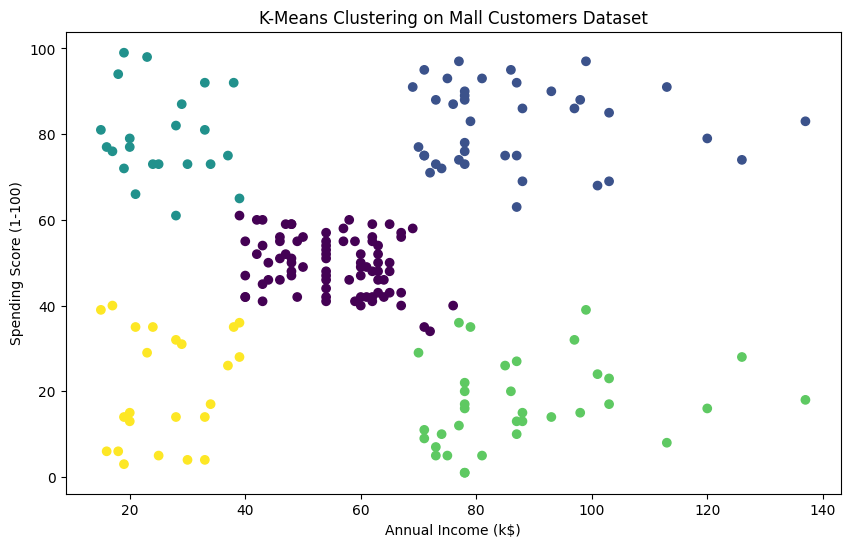

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Mall Customers dataset
# Download Mall_Customers from https://www.kaggle.com/datasets/shwetabh123/mall-customers?select=Mall_Customers.csv
df = pd.read_csv("Mall_Customers.csv")

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering on Mall Customers Dataset')
plt.show()


# Simple Recommender Systems Using Collaborative Filtering

In [ ]:
# Import necessary libraries
import pandas as pd
import zipfile
import os

# Upload the 'ml-latest-small.zip' file in Colab and set the path
zip_path = 'ml-latest-small.zip'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# Set the directory path
data_path = 'ml-latest-small/'

# Load the data
movies = pd.read_csv(os.path.join(data_path, 'movies.csv'))
ratings = pd.read_csv(os.path.join(data_path, 'ratings.csv'))

# Display the first few rows of the movies and ratings dataframes
print(movies.head())
print(ratings.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [ ]:
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assuming you have the `ratings` and `movies` DataFrames already loaded
# Create a user-item matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to recommend movies
def recommend_movies(user_id, num_recommendations):
    # Get the similarity scores for the given user
    sim_scores = user_similarity_df[user_id]

    # Get the user's ratings
    user_ratings = user_item_matrix.loc[user_id]

    # Predict ratings for all movies
    # Align indices before dot product
    predicted_ratings = user_item_matrix.T.dot(sim_scores) / sim_scores.sum()

    # Recommend the movies with the highest predicted ratings that the user hasn't seen
    recommendations = predicted_ratings[user_ratings == 0].sort_values(ascending=False).head(num_recommendations)
    recommended_movie_ids = recommendations.index
    recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]

    return recommended_movies[['movieId', 'title']]

# Example usage: Recommend 5 movies for user 1
recommendations = recommend_movies(1, 5)
print(recommendations)


      movieId                                              title
277       318                   Shawshank Redemption, The (1994)
507       589                  Terminator 2: Judgment Day (1991)
659       858                              Godfather, The (1972)
2078     2762                            Sixth Sense, The (1999)
3638     4993  Lord of the Rings: The Fellowship of the Ring,...
